# Graded Project - 2

### Domain - 
E-commerce

### Business Context -
<p style='text-align: justify;'>
Customer segmentation is one of the most important marketing tools at your disposal, because it can help a business to better understand its target audience. This is because it groups customers based on common characteristics. Segmentation can be based on the customer’s habits and lifestyle, in particular, their buying habits. Different age groups, for example, tend to spend their money in different ways, so brands need to be aware of who exactly is buying their product. Segmentation also focuses more on the personality of the consumer, including their opinions, interests, reviews, and rating. Breaking down a large customer base into more manageable clusters, making it easier to identify your target audience and launch campaigns and promote the business to the most relevant people. 
</p>

### Dataset Description -
<p style='text-align: justify;'>
The dataset contains measurements of clothing fit from RentTheRunway. RentTheRunWay is a unique platform that allows women to rent clothes for various occasions. The collected data is of several categories. This dataset contains self-reported fit feedback from customers as well as other side information like reviews, ratings, product categories, catalog sizes, customers’ measurements (etc.)
</p>

### Attribute Information -

- **User_id** - A unique id for the customer
- **Item_id** - Unique product id
- **Weight** - Weight measurement of customer
- **Rented For** - Purpose clothing was rented for
- **Body Type** - Body type of customer
- **Review_text** - Review given by the customer
- **Size** - The standardized size of the product
- **Rating** - Rating for the product
- **Age** - Age of the customer
- **Category** - The category of the product
- **Bust Size** - Bust measurement of customer
- **Height** - Height of the customer
- **Review_Date** - Date when the review was written
- **Fit** - Fit feedback

### Project Objective -
<p style='text-align: justify;'>
Based on the given users and items data of an e-commerce company, segment the similar user and items into suitable clusters. Analyze the clusters and provide your insights to help the organization promote their business. </p>

## A. Import the required libraries and load the data

### 1. Load the required libraries and read the dataset.


In [1]:
## Importing required libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import Normalizer
from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import ward
from scipy.cluster.hierarchy import fcluster
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import linkage
from scipy.spatial.distance import pdist
from scipy.spatial import distance
from scipy.stats import zscore

In [2]:
## Loading dataset and Checking the first 5 rows from the dataset
df = pd.read_csv("renttherunway.csv")
df.head()

Unnamed: 0  fit  user_id bust size  item_id  weight  rating     rented for  \
0           0  fit   420272       34d  2260466  137lbs    10.0       vacation   
1           1  fit   273551       34b   153475  132lbs    10.0          other   
2           2  fit   360448       NaN  1063761     NaN    10.0          party   
3           3  fit   909926       34c   126335  135lbs     8.0  formal affair   
4           4  fit   151944       34b   616682  145lbs    10.0        wedding   

                                         review_text          body type  \
0  An adorable romper! Belt and zipper were a lit...          hourglass   
1  I rented this dress for a photo shoot. The the...  straight & narrow   
2  This hugged in all the right places! It was a ...                NaN   
3  I rented this for my company's black tie award...               pear   
4  I have always been petite in my upper body and...           athletic   

                                      review_summary category height  size  \
0                               So many compliments!   romper  5' 8"    14   
1                            I felt so glamourous!!!     gown  5' 6"    12   
2  It was a great time to celebrate the (almost) ...   sheath  5' 4"     4   
3   Dress arrived on time and in perfect condition.     dress  5' 5"     8   
4                    Was in love with this dress !!!     gown  5' 9"    12   

     age         review_date  
0   28.0      April 20, 2016  
1   36.0       June 18, 2013  
2  116.0   December 14, 2015  
3   34.0   February 12, 2014  
4   27.0  September 26, 2016

### 2. Check the first few samples, shape, info of the data and try to familiarize yourself with different features.

In [3]:
# Checking the any 5 rows from the dataset
df.sample(5)

Unnamed: 0    fit  user_id bust size  item_id  weight  rating  \
148897      148897    fit   822334       32d   195076  120lbs     8.0   
82216        82216    fit   261182       34c  2107392  155lbs    10.0   
39863        39863    fit   899950       NaN   665360  130lbs    10.0   
131459      131459  large   763429       34b  1420770     NaN    10.0   
7034          7034    fit   201662       36c   806803  165lbs    10.0   

       rented for                                        review_text  \
148897      party                   Very True to Size and Flattering   
82216    everyday  Loved this piece.\n\nWore to work with a blaze...   
39863       party   Easy to wear and nice for a Gatsby themed party!   
131459    wedding  This is one of the best dresses I've ever worn...   
7034        party  This dress is a true show-stopper. It's so muc...   

        body type                                 review_summary category  \
148897     petite  Looking Great always makes for a great event.    dress   
82216    athletic                               Versatile Staple     down   
39863   full bust                        Comfortable and festive   sheath   
131459        NaN             Beautiful dress, will rent again!     dress   
7034    hourglass        Gorgeous dress and tons of compliments!    dress   

        height  size   age       review_date  
148897   5' 4"     8  36.0     April 9, 2014  
82216   5' 11"    14  32.0    March 21, 2016  
39863    5' 6"     8  32.0     June 15, 2016  
131459   5' 3"     1  34.0  October 12, 2015  
7034     5' 8"    20  61.0  January 29, 2014

In [4]:
## Checking the shape of the dataset
df.shape

(192544, 16)

In [5]:
## Gaining the basic information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unnamed: 0      192544 non-null  int64  
 1   fit             192544 non-null  object 
 2   user_id         192544 non-null  int64  
 3   bust size       174133 non-null  object 
 4   item_id         192544 non-null  int64  
 5   weight          162562 non-null  object 
 6   rating          192462 non-null  float64
 7   rented for      192534 non-null  object 
 8   review_text     192482 non-null  object 
 9   body type       177907 non-null  object 
 10  review_summary  192199 non-null  object 
 11  category        192544 non-null  object 
 12  height          191867 non-null  object 
 13  size            192544 non-null  int64  
 14  age             191584 non-null  float64
 15  review_date     192544 non-null  object 
dtypes: float64(2), int64(4), object(10)
memory usage: 23.5+ 

In [6]:
## Checkiing the size of data
df.size

3080704

In [7]:
## Checkining the dimension of dataframe
df.ndim

2

In [8]:
## Checking the dimension of series in the dataframe
df["fit"].ndim

1

In [9]:
## Checking the statistical summary of the dataset
df.describe()

Unnamed: 0        user_id       item_id         rating  \
count  192544.000000  192544.000000  1.925440e+05  192462.000000   
mean    96271.500000  499494.100149  1.045684e+06       9.092371   
std     55582.809453  289059.719328  8.053148e+05       1.430044   
min         0.000000       9.000000  1.233730e+05       2.000000   
25%     48135.750000  250654.250000  1.950760e+05       8.000000   
50%     96271.500000  499419.000000  9.483960e+05      10.000000   
75%    144407.250000  750974.000000  1.678888e+06      10.000000   
max    192543.000000  999997.000000  2.966087e+06      10.000000   

                size            age  
count  192544.000000  191584.000000  
mean       12.245175      33.871017  
std         8.494877       8.058083  
min         0.000000       0.000000  
25%         8.000000      29.000000  
50%        12.000000      32.000000  
75%        16.000000      37.000000  
max        58.000000     117.000000

In [10]:
## Checking the statistical summary of dataset -- for object type
df.describe(include = 'O')

fit bust size  weight rented for review_text  body type  \
count   192544    174133  162562     192534      192482     177907   
unique       3       106     190          9      191027          7   
top        fit       34b  130lbs    wedding           .  hourglass   
freq    142058     27285   14370      57784          63      55349   

        review_summary category  height    review_date  
count           192199   192544  191867         192544  
unique          154736       68      24           2274  
top     Stylist Review    dress   5' 4"  June 15, 2016  
freq               977    92884   28012            844

In [11]:
## Checking the Percentage of null values in a specific column of the dataset
df.isnull().sum()/len(df) * 100

Unnamed: 0         0.000000
fit                0.000000
user_id            0.000000
bust size          9.561970
item_id            0.000000
weight            15.571506
rating             0.042588
rented for         0.005194
review_text        0.032200
body type          7.601899
review_summary     0.179180
category           0.000000
height             0.351608
size               0.000000
age                0.498587
review_date        0.000000
dtype: float64

- The dataset contains several columns, including ‘fit’, ‘user_id’, ‘bust size’, ‘item_id’, ‘weight’, ‘rating’, ‘rented for’, ‘review_text’, ‘body type’, ‘review_summary’, ‘category’, ‘height’, ‘size’, ‘age’, and ‘review_date’. These columns could represent various attributes.

- There are a total of 192544 entries in this dataset.
- We have a 2 dimensional dataset (columns and rows); The entries of the column are 1 dimensional data
- We can see that there are some null entries also in some columns


## B. Data cleansing and Exploratory data analysis

### 3. Check if there are any duplicate records in the dataset? If any, drop them.

In [12]:
check_duplicate = len(df[df.duplicated()])
if check_duplicate > 0:
   
    df = df.drop_duplicates()

    print(f"\033[1m {check_duplicate} duplicate record(s) found and dropped.\033[0m")
else:
    print("\033[1m No duplicate records found.\033[0m")

 No duplicate records found.


- The dataset does not contain any duplicate record.

### 4. Drop the columns which you think redundant for the analysis.(Hint: drop columns like ‘id’, ‘review’) 

In [13]:
df.columns

Index(['Unnamed: 0', 'fit', 'user_id', 'bust size', 'item_id', 'weight',
       'rating', 'rented for', 'review_text', 'body type', 'review_summary',
       'category', 'height', 'size', 'age', 'review_date'],
      dtype='object')

In [14]:
df.drop(['Unnamed: 0', 'user_id', 'item_id','review_text', 'review_summary','review_date'], inplace=True, axis=1)

In [15]:
df.columns

Index(['fit', 'bust size', 'weight', 'rating', 'rented for', 'body type',
       'category', 'height', 'size', 'age'],
      dtype='object')

In [16]:
df.shape

(192544, 10)

In [17]:
df.head()

fit bust size  weight  rating     rented for          body type category  \
0  fit       34d  137lbs    10.0       vacation          hourglass   romper   
1  fit       34b  132lbs    10.0          other  straight & narrow     gown   
2  fit       NaN     NaN    10.0          party                NaN   sheath   
3  fit       34c  135lbs     8.0  formal affair               pear    dress   
4  fit       34b  145lbs    10.0        wedding           athletic     gown   

  height  size    age  
0  5' 8"    14   28.0  
1  5' 6"    12   36.0  
2  5' 4"     4  116.0  
3  5' 5"     8   34.0  
4  5' 9"    12   27.0

- We dropped these redundant columns : 'Unnamed', 'user_id', 'item_id', 'review_text', 'review_summary', 'review_date'

### 5. Check the column 'weight', Is there any presence of string data? If yes, remove the string data and convert to float. (Hint: 'weight' has the suffix as lbs) 

In [18]:
df['weight']

0         137lbs
1         132lbs
2            NaN
3         135lbs
4         145lbs
           ...  
192539    140lbs
192540    100lbs
192541    135lbs
192542    165lbs
192543    155lbs
Name: weight, Length: 192544, dtype: object

In [19]:
if df['weight'].str.contains('[a-zA-Z]').any():
    df['weight'] = df['weight'].str.replace('lbs', '').astype(float)

In [20]:
df['weight']

0         137.0
1         132.0
2           NaN
3         135.0
4         145.0
          ...  
192539    140.0
192540    100.0
192541    135.0
192542    165.0
192543    155.0
Name: weight, Length: 192544, dtype: float64

### 6. Check the unique categories for the column 'rented for' and group 'party:cocktail' category with 'party'.

In [21]:
## Checking unique categories in the column 'rented for'.
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan, 'party: cocktail'], dtype=object)

In [22]:
df['rented for'] = df['rented for'].replace(['party', 'party: cocktail' ], 'party' )

In [23]:
df['rented for'].unique()

array(['vacation', 'other', 'party', 'formal affair', 'wedding', 'date',
       'everyday', 'work', nan], dtype=object)

### 7. The column 'height' is in feet with a quotation mark, Convert to inches with float datatype. 

In [24]:
df['height']

0         5' 8"
1         5' 6"
2         5' 4"
3         5' 5"
4         5' 9"
          ...  
192539    5' 9"
192540    5' 1"
192541    5' 8"
192542    5' 6"
192543    5' 6"
Name: height, Length: 192544, dtype: object

In [25]:
df['height'] = df['height'].str.replace('"','')

In [26]:
df["height"] = (df.height.str.split("'").str[0].astype(float) * 12) + (df.height.str.split("'").str[1].astype(float))

In [27]:
df["height"]

0         68.0
1         66.0
2         64.0
3         65.0
4         69.0
          ... 
192539    69.0
192540    61.0
192541    68.0
192542    66.0
192543    66.0
Name: height, Length: 192544, dtype: float64

- Now "Height" column is converted to Float datatype (dtype: float64).
- Quotation mark has been removed as requested and height is in inches.

### 8. Check for missing values in each column of the dataset? If it exists, impute them with appropriate methods.

In [28]:
## Getting column-wise count of missing values.
df.isnull().sum()/len(df) * 100

fit            0.000000
bust size      9.561970
weight        15.571506
rating         0.042588
rented for     0.005194
body type      7.601899
category       0.000000
height         0.351608
size           0.000000
age            0.498587
dtype: float64

- The columns ‘fit’, ‘category’, and ‘size’ have no null values (0%).
- The ‘bust size’ column has approximately 9.56% null values.
- The ‘weight’ column has the highest percentage of null values, approximately 15.57%.
- The ‘rating’ column has a very small percentage of null values, approximately 0.04%.
- The ‘rented for’ column also has a very small percentage of null values, approximately 0.005%.
- The ‘body type’ column has approximately 7.60% null values.
- The ‘height’ column has approximately 0.35% null values.
- Lastly, the ‘age’ column has approximately 0.50% null values.

We are treating the missing values in the following manner -

- For numerical columns, missing values are filled with the median of the respective column. 
- For categorical columns, missing values are filled with the mode (the most frequently occurring value) of the respective column.

In [29]:
numerical_columns = df.select_dtypes(include=[np.number]).columns.tolist()
categorical_columns = df.select_dtypes(include=[object]).columns.tolist()
print('Numerical Columns = ' , numerical_columns)
print('Categorical Columns= ' , categorical_columns)

Numerical Columns =  ['weight', 'rating', 'height', 'size', 'age']
Categorical Columns=  ['fit', 'bust size', 'rented for', 'body type', 'category']


In [30]:
df[numerical_columns] = df[numerical_columns].apply(lambda x: x.fillna(x.median()))

df[categorical_columns] = df[categorical_columns].apply(lambda x: x.fillna(x.mode().iloc[0]))

In [31]:
df.isnull().sum()/len(df) * 100

fit           0.0
bust size     0.0
weight        0.0
rating        0.0
rented for    0.0
body type     0.0
category      0.0
height        0.0
size          0.0
age           0.0
dtype: float64

In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 192544 entries, 0 to 192543
Data columns (total 10 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   fit         192544 non-null  object 
 1   bust size   192544 non-null  object 
 2   weight      192544 non-null  float64
 3   rating      192544 non-null  float64
 4   rented for  192544 non-null  object 
 5   body type   192544 non-null  object 
 6   category    192544 non-null  object 
 7   height      192544 non-null  float64
 8   size        192544 non-null  int64  
 9   age         192544 non-null  float64
dtypes: float64(4), int64(1), object(5)
memory usage: 14.7+ MB


- Total count of missing entries in each column is observed.
- All null or NaN values are imputed as:
    - 0 for float datatype.
    - 'Missing' for object datatype (string).
- Finally, all column information is retrieved and it is verified that there are no null values in the dataset.

### 9. Check the statistical summary for the numerical and categorical columns and write your findings.

In [33]:
## Checking the statistical summary of data.
df.describe().T

count        mean        std   min    25%    50%    75%    max
weight  192544.0  137.019284  20.141448  50.0  125.0  135.0  145.0  300.0
rating  192544.0    9.092758   1.429862   2.0    8.0   10.0   10.0   10.0
height  192544.0   65.309529   2.658857  54.0   63.0   65.0   67.0   78.0
size    192544.0   12.245175   8.494877   0.0    8.0   12.0   16.0   58.0
age     192544.0   33.861689   8.039050   0.0   29.0   32.0   37.0  117.0

From the above statistical summary we can derive the following -

- Weight: The average weight is approximately 137 lbs, with a standard deviation of around 20 lbs. The minimum weight is 50 lbs and the maximum is 300 lbs. The 25th, 50th (median), and 75th percentiles are 125 lbs, 135 lbs, and 145 lbs respectively.

- Rating: The average rating is approximately 9.09, with a standard deviation of around 1.43. The minimum rating is 2 and the maximum is 10. The median rating is 10, which indicates that at least half of the ratings are perfect scores.

- Height: The average height is approximately 65.31 inches (or about 5’5"), with a standard deviation of around 2.66 inches. The minimum height is 54 inches (4’6") and the maximum is 78 inches (6’6"). The median height is 65 inches (5’5").

- Size: The average size is approximately 12.24, with a standard deviation of around 8.49. The minimum size is 0 and the maximum is 58. The median size is 12.

- Age: The average age is approximately 33.86 years, with a standard deviation of around 8.04 years. The minimum age is listed as 0, which might indicate some missing values/wrong data. The maximum age is 117 years, which could also be an outlier or error. The median age is 32 years.


In [34]:
df.describe(include='object').T

count unique        top    freq
fit         192544      3        fit  142058
bust size   192544    106        34b   45696
rented for  192544      8    wedding   57794
body type   192544      7  hourglass   69986
category    192544     68      dress   92884

From the above statistical summary we can derive the following -

- Fit: There are 3 unique values in the ‘fit’ column. The most frequent value is ‘fit’, which appears 142,058 times.

- Bust Size: There are 106 unique values in the ‘bust size’ column. The most frequent value is ‘34b’, which appears 45,696 times.

- Rented For: There are 8 unique values in the ‘rented for’ column. The most frequent value is ‘wedding’, which appears 57,794 times.

- Body Type: There are 7 unique values in the ‘body type’ column. The most frequent value is ‘hourglass’, which appears 69,986 times.

- Category: There are 68 unique values in the ‘category’ column. The most frequent value is ‘dress’, which appears 92,884 times.


### 10. Are there outliers present in the column age? If yes, treat them with the appropriate method.

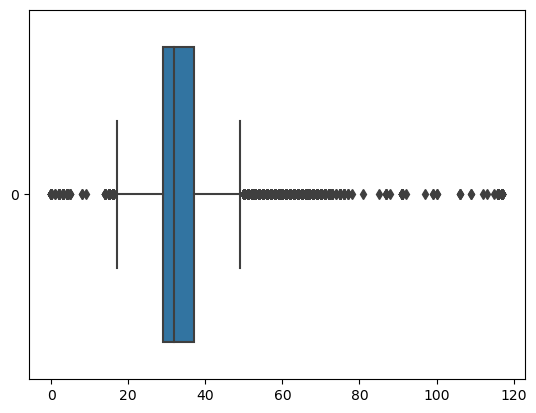

In [35]:
sns.boxplot(df['age'], orient="h")
plt.show()

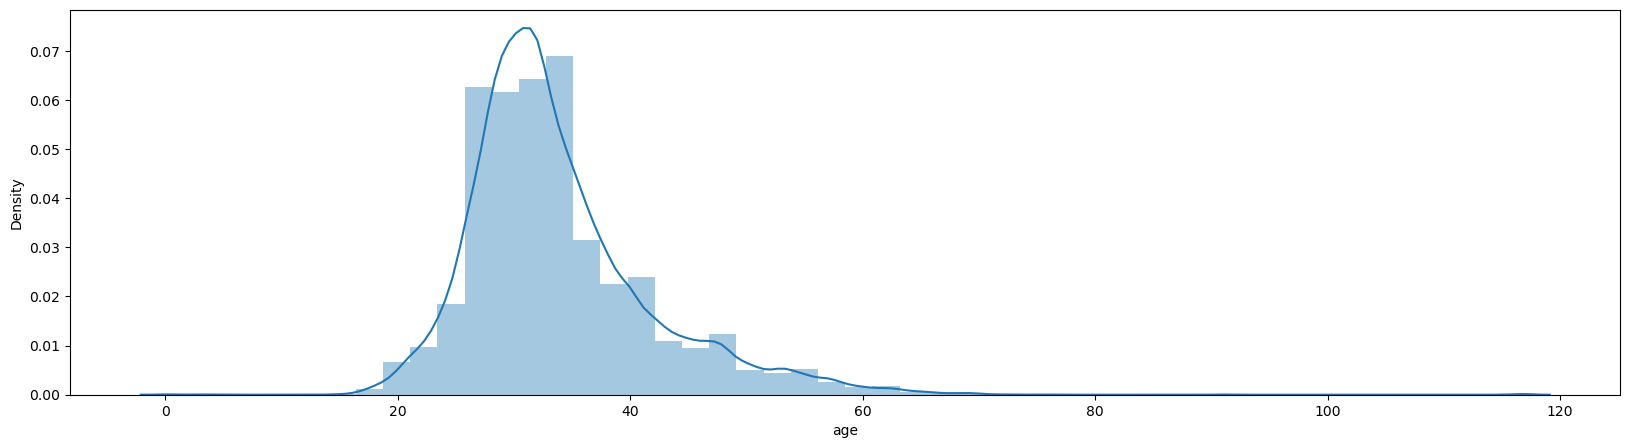

In [36]:
plt.figure(figsize=[20,5])
sns.distplot(df['age'])
plt.show()

- The data is skewed to the right, indicating outliers.

In [37]:
Q1 = df['age'].quantile(0.25)
Q3 = df['age'].quantile(0.75)
IQR = Q3 - Q1

print('Quartile 1 = ', Q1)
print('Quartile 3 = ', Q3)
print('Inter Quartile Range = ', IQR)

Quartile 1 =  29.0
Quartile 3 =  37.0
Inter Quartile Range =  8.0


In [38]:
lower_whisker = Q1-(1.5*IQR)
upper_whisker = Q3+(1.5*IQR)

print('Lower Whisker = ', lower_whisker)
print('Upper Whisker = ' , upper_whisker)

Lower Whisker =  17.0
Upper Whisker =  49.0


In [39]:
df = df.loc[(df['age'] < upper_whisker) & (df['age'] > lower_whisker)]

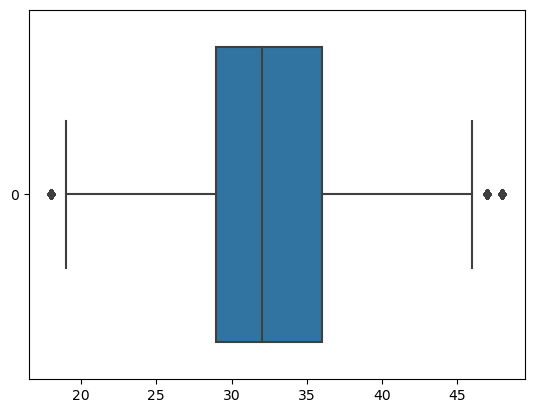

In [40]:
sns.boxplot(df['age'], orient="h")
plt.show()

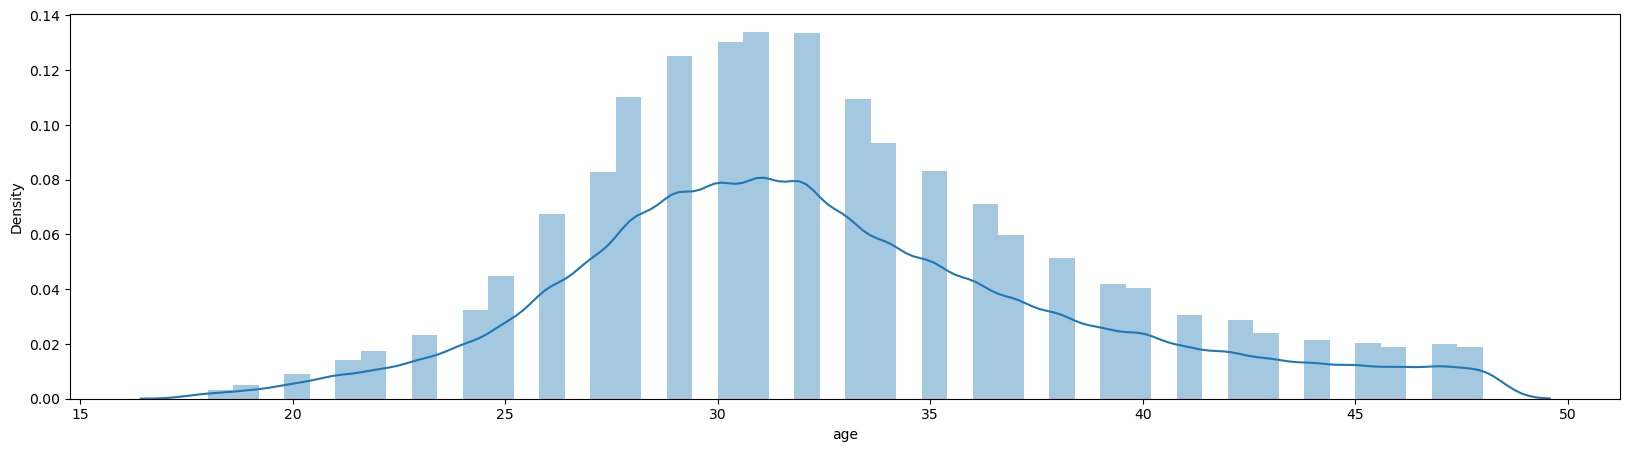

In [41]:
plt.figure(figsize=[20,5])
sns.distplot(df['age'])
plt.show()

In [42]:
df.head()

fit bust size  weight  rating     rented for          body type category  \
0  fit       34d   137.0    10.0       vacation          hourglass   romper   
1  fit       34b   132.0    10.0          other  straight & narrow     gown   
3  fit       34c   135.0     8.0  formal affair               pear    dress   
4  fit       34b   145.0    10.0        wedding           athletic     gown   
5  fit       32b   138.0     8.0           date           athletic    dress   

   height  size   age  
0    68.0    14  28.0  
1    66.0    12  36.0  
3    65.0     8  34.0  
4    69.0    12  27.0  
5    68.0     8  45.0

- From the box-plot, it is evident that there are a lot of outliers available for the column 'age'.
- So using the IQR treatment, the outliers are removed and minimised. The results of the same can be observed in the after treatment box-plot.

### 11. Check the distribution of the different categories in the column 'rented for' using appropriate plot.

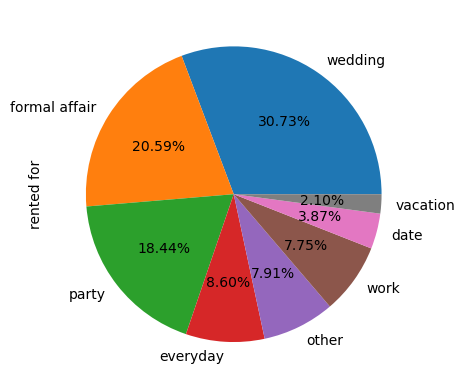

In [43]:
df['rented for'].value_counts().plot(kind='pie',autopct='%1.2f%%')
plt.show()

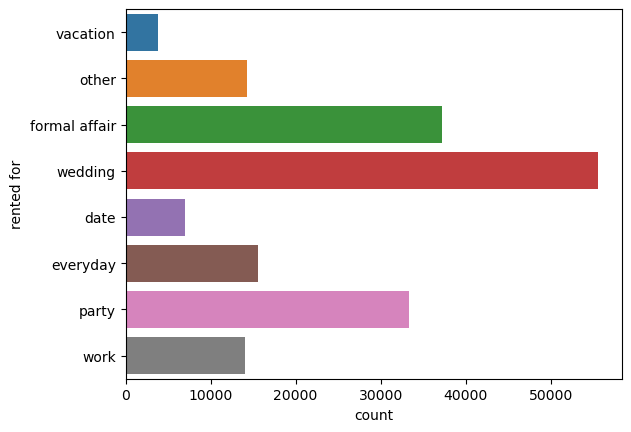

In [44]:
## let us check the distribution of the column rented for
sns.countplot(y = df['rented for'])
plt.show()

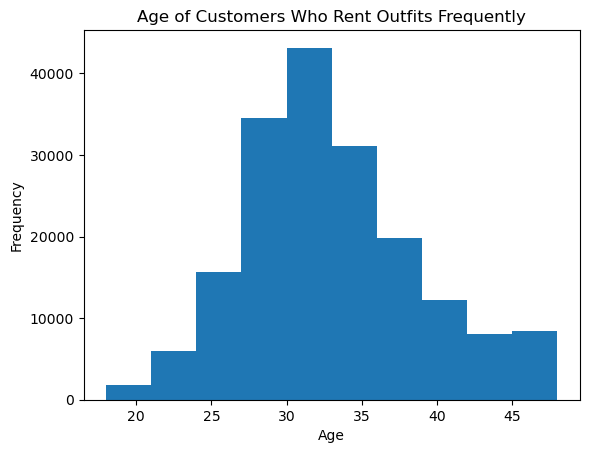

In [45]:
plt.hist(df['age'], bins=10)
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.title('Age of Customers Who Rent Outfits Frequently')
plt.show()

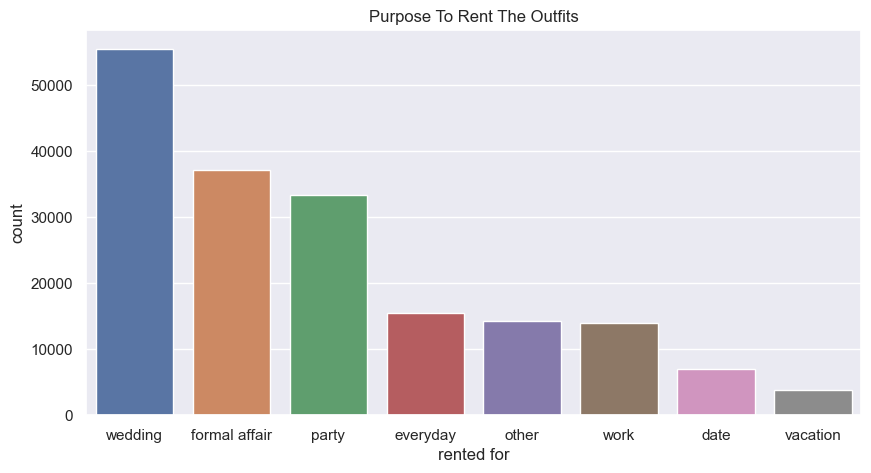

In [46]:
# Ploting the categorical values using count plot
sns.set(rc={"figure.figsize":(10,5)})
sns.countplot(x='rented for', data = df, 
              order=['wedding','formal affair','party','everyday','other','work','date','vacation'])
plt.title('Purpose To Rent The Outfits')
plt.show()

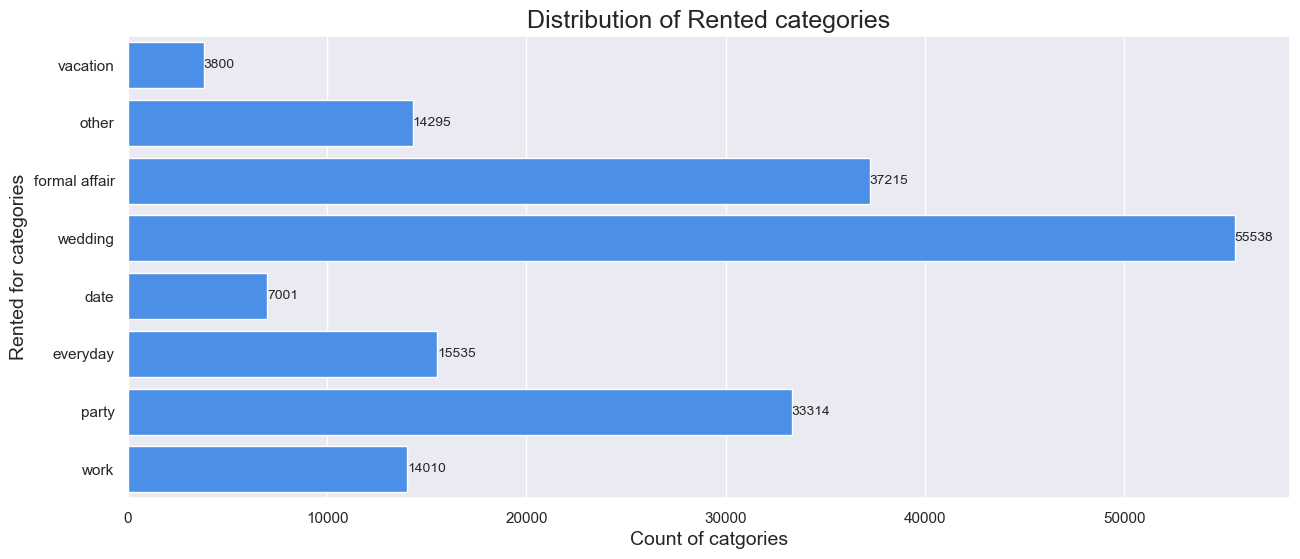

In [47]:
## count plot for 'rented for' column

plt.figure(figsize = (15, 6))
position_df = sns.countplot( y = df['rented for'], color = '#338CFF')

position_df.set_xlabel(xlabel = 'Count of catgories', fontsize = 14)
position_df.set_ylabel(ylabel = 'Rented for categories', fontsize = 14)
#plt.xticks(rotation=45)
position_df.set_title(label = 'Distribution of Rented categories', fontsize = 18)

position_df.bar_label(position_df.containers[0], fontsize = 10)

plt.show()

We can infer the following -

- The above plots show distribution of Rented-for categories over the dataset.
- The outfits are most frequently rented by customers aged 21 to 30 years.
- It is seen that customers rent outfits mostly for 'weddings' followed by 'formal affair' and least for 'vacation'.
- The number of customers who rented their costumes for weddings range about 55538 which computes to 30.73% of total categories.
- The least used purpose like 'vacation' includes about 3800 entries (2%) and 'date' includes 7001 entries (4%).

#### Note -
   - Analyzing this dataset is computationally intensive due to its size. To mitigate this, we are selecting a random sample of 20,000 entries, which constitutes slightly more than 10% of the total dataset. This random sampling approach provides us with a representative subset for our analysis, although results may vary with different samples.


### Random Sampling for Analysis - Sampling Size = 20,000 (11.07% of the Total Data)

In [48]:
df.head()

fit bust size  weight  rating     rented for          body type category  \
0  fit       34d   137.0    10.0       vacation          hourglass   romper   
1  fit       34b   132.0    10.0          other  straight & narrow     gown   
3  fit       34c   135.0     8.0  formal affair               pear    dress   
4  fit       34b   145.0    10.0        wedding           athletic     gown   
5  fit       32b   138.0     8.0           date           athletic    dress   

   height  size   age  
0    68.0    14  28.0  
1    66.0    12  36.0  
3    65.0     8  34.0  
4    69.0    12  27.0  
5    68.0     8  45.0

In [49]:
df.isnull().sum().sum()

0

In [50]:
df.shape

(180708, 10)

In [51]:
data = df.sample(n=20000, random_state=10).reset_index()
data.drop(['index'], inplace=True, axis=1)

In [52]:
data.head()

fit bust size  weight  rating rented for  body type category  height  \
0    fit       34c   140.0     8.0       work       pear    dress    67.0   
1    fit       36d   140.0    10.0      other  full bust    dress    64.0   
2    fit       32b   100.0    10.0      party     petite   sheath    62.0   
3    fit      36dd   163.0    10.0   everyday  full bust   jacket    66.0   
4  small       36b   135.0     8.0    wedding  hourglass    shift    68.0   

   size   age  
0     8  37.0  
1    20  37.0  
2     1  30.0  
3    20  47.0  
4    20  32.0

In [53]:
data.isnull().sum().sum()

0

In [54]:
data.shape

(20000, 10)

## C. Data Preparation for model building

### 12. Encode the categorical variables in the dataset. 

In [55]:
dfe = data.copy()

In [56]:
dfe.shape

(20000, 10)

In [57]:
## Get all columns with type 'Object'
cols = dfe.select_dtypes('object').columns

cols

Index(['fit', 'bust size', 'rented for', 'body type', 'category'], dtype='object')

In [58]:
## Perform label encoding for selected columns. 
labelEncoder = LabelEncoder()

for i in cols:
    dfe[i]=labelEncoder.fit_transform(data[i])

In [59]:
dfe.head()

fit  bust size  weight  rating  rented for  body type  category  height  \
0    0         32   140.0     8.0           7          4        12    67.0   
1    0         45   140.0    10.0           3          2        12    64.0   
2    0         18   100.0    10.0           4          5        36    62.0   
3    0         47   163.0    10.0           1          2        17    66.0   
4    2         43   135.0     8.0           6          3        37    68.0   

   size   age  
0     8  37.0  
1    20  37.0  
2     1  30.0  
3    20  47.0  
4    20  32.0

- All categorical columns are encoded and now converted to numerical type using the LabelEncoder technique.

### 13. Standardize the data, so that the values are within a particular range.

In [60]:
## Standardizing the columns

scaler = StandardScaler()

dfs = pd.DataFrame(scaler.fit_transform(dfe), columns=dfe.columns)

In [61]:
print("\033[1mAll features are now scaled.\033[0m")
dfs.head()

All features are now scaled.


fit  bust size    weight    rating  rented for  body type  category  \
0 -0.558212  -0.032392  0.152080 -0.763732    1.483774   0.648129 -0.581060   
1 -0.558212   1.242887  0.152080  0.645368   -0.467309  -0.619791 -0.581060   
2 -0.558212  -1.405769 -1.827066  0.645368    0.020462   1.282088  1.665124   
3 -0.558212   1.439083  1.290089  0.645368   -1.442850  -0.619791 -0.113105   
4  2.252168   1.046690 -0.095313 -0.763732    0.996003   0.014169  1.758715   

     height      size       age  
0  0.627336 -0.476277  0.766187  
1 -0.498806  0.947800  0.766187  
2 -1.249568 -1.306988 -0.421371  
3  0.251956  0.947800  2.462698  
4  1.002717  0.947800 -0.082069

## D. Principal Component Analysis and Clustering

### 14. Apply PCA on the above dataset and determine the number of PCA components to be used so that 90-95% of the variance in data is explained by the same.

In [62]:
dfs.shape

(20000, 10)

In [63]:
## Step 1: Calculate the covariance matrix

cov_matrix = np.cov(dfs.T)

In [64]:
print('\033[1mCovariance Matrix\033[0m','\n', cov_matrix)

Covariance Matrix 
 [[ 1.00005000e+00  6.24174708e-03  1.20814181e-02 -2.48824772e-01
   9.50343994e-03 -8.12611242e-03 -3.21258156e-03 -6.41755218e-03
   6.42796158e-02 -1.07924715e-02]
 [ 6.24174708e-03  1.00005000e+00  5.76912367e-01 -3.23915334e-02
   6.82137809e-03 -2.29072439e-01 -5.94504414e-03  1.48975520e-01
   6.23649112e-01  1.48710917e-01]
 [ 1.20814181e-02  5.76912367e-01  1.00005000e+00 -2.77906346e-02
   1.71327894e-02 -2.42217456e-01 -9.45413114e-03  3.49146267e-01
   7.24714334e-01  6.85616971e-02]
 [-2.48824772e-01 -3.23915334e-02 -2.77906346e-02  1.00005000e+00
   1.06105786e-02  1.36806000e-02 -2.97938789e-02 -4.28258407e-04
  -5.25414439e-02 -5.32862956e-02]
 [ 9.50343994e-03  6.82137809e-03  1.71327894e-02  1.06105786e-02
   1.00005000e+00 -8.80956847e-03 -3.07316195e-02 -1.86051155e-02
   1.19168550e-02 -2.72972813e-02]
 [-8.12611242e-03 -2.29072439e-01 -2.42217456e-01  1.36806000e-02
  -8.80956847e-03  1.00005000e+00 -5.02219076e-03 -1.41960287e-01
  -2.21800934

In [65]:
## Step 2: Calculate eigen values and eigen vectors 

eigen_values, eigen_vectors = np.linalg.eig(cov_matrix)

print('\033[1mEigen Values: \033[0m', '\n',eigen_values)
print('\n')
print('\033[1mEigen Vectors: \033[0m','\n',eigen_vectors)

Eigen Values:  
 [2.5588255  0.2588197  0.41413689 1.25296228 0.74100552 1.05664243
 1.01044516 0.97161956 0.84772024 0.88832274]


Eigen Vectors:  
 [[-3.61025129e-02 -4.90820114e-02  4.20917959e-02 -6.86479666e-01
  -6.79300974e-01  2.10000178e-01  7.95237087e-02  4.86819296e-02
   9.21144313e-02 -2.30782646e-02]
 [-4.96324793e-01 -8.71402738e-02  7.91853483e-01  2.08258907e-02
   5.20147186e-02 -7.71621112e-02 -1.67016559e-01 -9.58281864e-03
   2.13326190e-01 -1.90915346e-01]
 [-5.44594148e-01 -6.84369200e-01 -4.38477460e-01  5.63481554e-02
   2.63071012e-02  7.05935326e-02  5.74794476e-02 -2.95864949e-03
  -1.64532720e-02 -1.74239932e-01]
 [ 5.05335741e-02  1.81390497e-03  1.80676250e-03  7.01047043e-01
  -6.95183896e-01  2.86372801e-03 -2.83863670e-02 -2.07351703e-02
   1.29727311e-01 -6.79638814e-02]
 [-8.33287171e-03  6.77485306e-03  1.45540721e-02  2.19063682e-02
   1.52325243e-02  5.50944549e-01 -4.76455912e-01 -6.45383836e-01
  -2.16878760e-01  6.96713772e-02]
 [ 2.64060217e-

In [66]:
## Step 3 : Calculating the Variance explained and the cummulative variance explained

total = sum(eigen_values)

variance_explained = [(i/total)*100 for i in sorted(eigen_values, reverse=True)]

cummulative_variance_explained = np.cumsum(variance_explained)

In [67]:
print('\033[1mVariance Explained : \033[0m','\n', variance_explained)
print('\n')
print('\033[1mCummulative Variance Explained : \033[0m','\n', cummulative_variance_explained)

Variance Explained :  
 [25.586975569658694, 12.52899629900541, 10.565895972880048, 10.103946361350385, 9.715709758421367, 8.88278327138839, 8.476778547740306, 7.409684731155654, 4.141161875890029, 2.5880676125097146]


Cummulative Variance Explained :  
 [ 25.58697557  38.11597187  48.68186784  58.7858142   68.50152396
  77.38430723  85.86108578  93.27077051  97.41193239 100.        ]


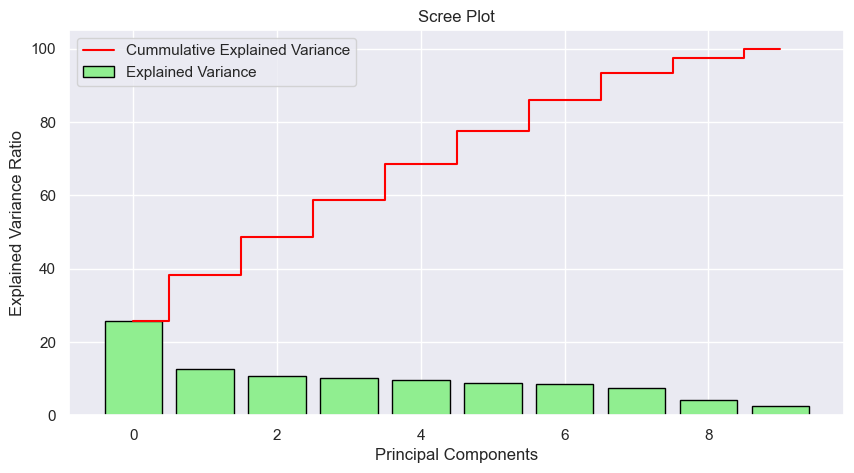

In [68]:
## Scree plot

plt.bar(range(10), variance_explained, align='center', color='lightgreen', edgecolor='black', label='Explained Variance')
plt.step(range(10), cummulative_variance_explained, where='mid', color='red', label='Cummulative Explained Variance')

plt.xlabel('Principal Components')
plt.ylabel('Explained Variance Ratio')

plt.title('Scree Plot')
plt.legend(loc='best')
plt.show()

- To achieve 90 - 95% of the variance, we select the first 8 principal components. The cumulative variance explained is 93.27% at the 8th component. So, we choose the First 8 Principal Components to satisfy the requirement of 90-95%

### 15. Apply K-means clustering and segment the data. (You may use original data or PCA transformed data)

a. Find the optimal K Value using elbow plot for K Means clustering.

b. Build a Kmeans clustering model using the obtained optimal K value from the elbow plot.

c. Compute silhouette score for evaluating the quality of the K Means clustering technique.

In [69]:
## Using the dimensions obtained from the PCA to apply clustering.(i.e, 8)

pca = PCA(n_components=8)

pca_df = pd.DataFrame(pca.fit_transform(dfs), columns=['PC-1','PC-2','PC-3','PC-4','PC-5','PC-6', 'PC-7', 'PC-8'])

In [70]:
pca_df.head()

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0 -0.065297  0.085858 -0.660890 -1.116821  0.358088 -0.067057 -1.578394   
1  1.280418 -0.781451  0.686735 -0.950412 -0.650037 -0.138184  0.767793   
2 -3.189877 -0.433435  0.998316  0.312626  1.303126  0.765587  0.234450   
3  2.400504 -0.697264  2.251740 -0.884776 -1.135284 -0.357616 -0.266947   
4  1.364009  2.092182 -0.267467  0.710883  1.774166  0.345727 -0.466555   

       PC-8  
0  0.774177  
1 -0.084980  
2 -0.118093  
3 -0.492296  
4 -1.134705

In [71]:
pca_df.shape

(20000, 8)

In [72]:
cluster_errors = []
cluster_range = range(2,15)

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters,random_state=100)
    clusters.fit(pca_df)
    cluster_errors.append(clusters.inertia_)

In [73]:
cluster_df = pd.DataFrame({'Clusters':cluster_range,'Cluster_Errors':cluster_errors})

In [74]:
cluster_df

Clusters  Cluster_Errors
0          2   155209.850730
1          3   141014.885140
2          4   129442.111052
3          5   119639.425269
4          6   113460.750188
5          7   108072.784674
6          8   103082.305974
7          9    99897.964691
8         10    96779.108738
9         11    94187.821444
10        12    91840.402225
11        13    89368.832108
12        14    87546.659118

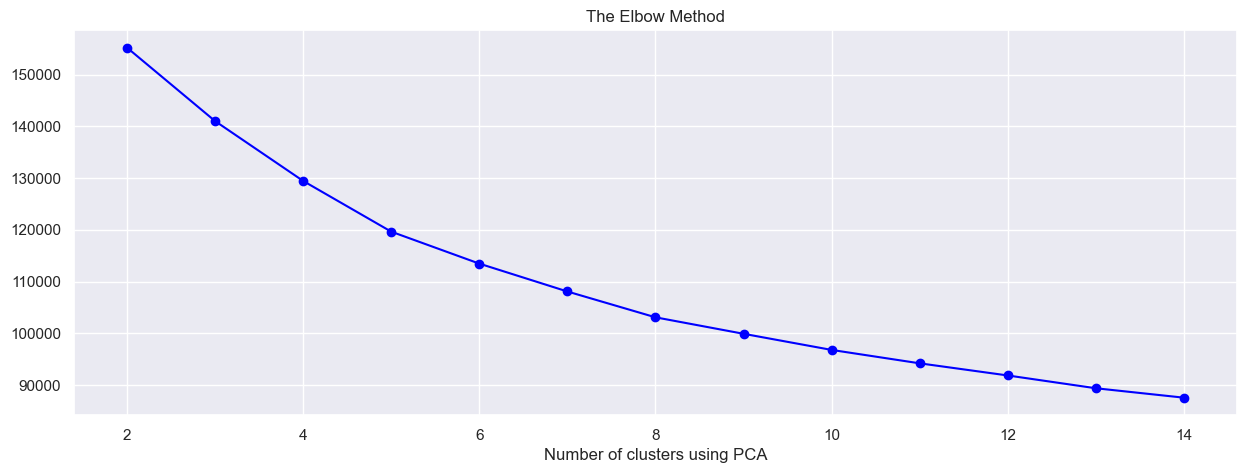

In [75]:
## Elbow method
## Elbow plot
plt.figure(figsize=[15,5])
plt.title('The Elbow Method')
plt.xlabel('Number of clusters using PCA')
plt.plot(cluster_df['Clusters'],cluster_df['Cluster_Errors'],marker='o',color='blue')
plt.show()

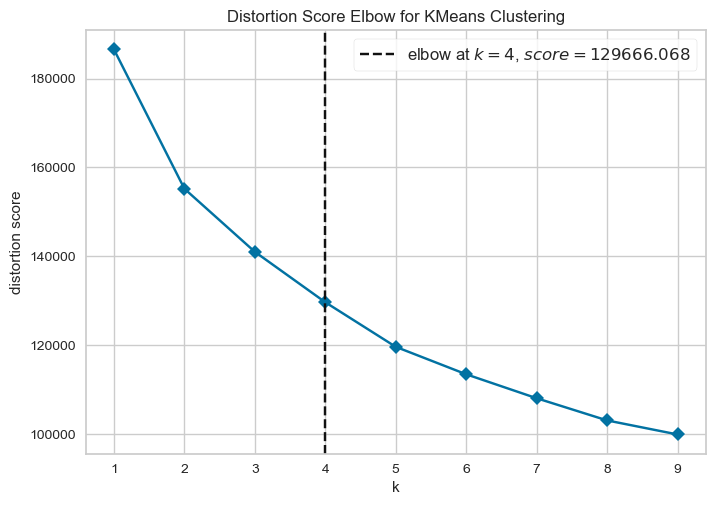

<Axes: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [76]:
from yellowbrick.cluster import KElbowVisualizer

# Making sure the above elbow score was accurate

model = KMeans()
visulizer = KElbowVisualizer(model,k=(1,10),timings=False)
visulizer.fit(pca_df)
visulizer.show()

- Based on the Elbow Method’s analysis, a significant drop in inertia is noticeable when the number of clusters is 4. This suggests that the optimal choice for the number of clusters, can be considered as 4.

In [77]:
kmeans = KMeans(n_clusters=4, random_state=100)
kmeans.fit(pca_df)

KMeans(n_clusters=4, random_state=100)

In [78]:
label = pd.DataFrame(kmeans.labels_, columns=['Label'])

In [79]:
kmeans_df = pca_df.join(label)

In [80]:
kmeans_df.head()

PC-1      PC-2      PC-3      PC-4      PC-5      PC-6      PC-7  \
0 -0.065297  0.085858 -0.660890 -1.116821  0.358088 -0.067057 -1.578394   
1  1.280418 -0.781451  0.686735 -0.950412 -0.650037 -0.138184  0.767793   
2 -3.189877 -0.433435  0.998316  0.312626  1.303126  0.765587  0.234450   
3  2.400504 -0.697264  2.251740 -0.884776 -1.135284 -0.357616 -0.266947   
4  1.364009  2.092182 -0.267467  0.710883  1.774166  0.345727 -0.466555   

       PC-8  Label  
0  0.774177      3  
1 -0.084980      1  
2 -0.118093      2  
3 -0.492296      1  
4 -1.134705      0

In [81]:
kmeans_df['Label'].value_counts()

3    8692
1    5049
0    3209
2    3050
Name: Label, dtype: int64

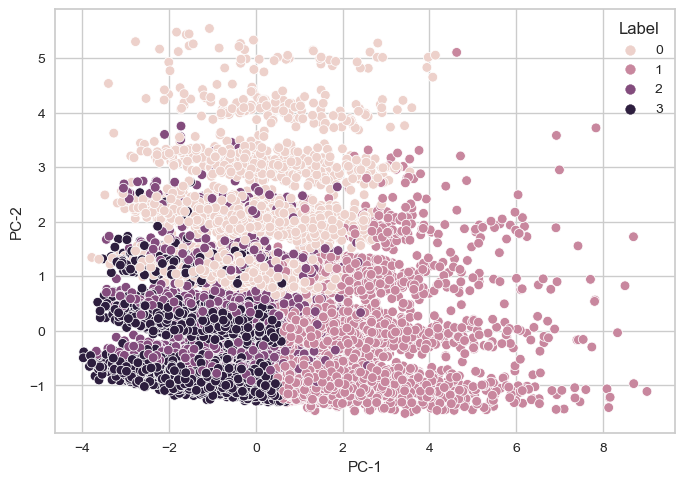

In [82]:
## Visualizing the clusters formed 

sns.scatterplot(x='PC-1', y='PC-2', hue='Label', data=kmeans_df)
plt.show()

In [83]:

## Compute silhouette score for evaluating the quality of the K Means clustering technique. Took a sample of records (20000) to 
## reduce computational time.

for i in range(2,15):
    kmeans = KMeans(n_clusters=i)
    kmeans = kmeans.fit(pca_df)
    labels = kmeans.predict(pca_df)
    print('\033[1mSilhouette Score for Cluster :\033[0m', i ,' - ', silhouette_score(pca_df, labels))

Silhouette Score for Cluster : 2  -  0.15964365931626612
Silhouette Score for Cluster : 3  -  0.1585918210886182
Silhouette Score for Cluster : 4  -  0.1578728176440753
Silhouette Score for Cluster : 5  -  0.13562147520179146
Silhouette Score for Cluster : 6  -  0.12702807175918543
Silhouette Score for Cluster : 7  -  0.12794015279396803
Silhouette Score for Cluster : 8  -  0.12714194697999243
Silhouette Score for Cluster : 9  -  0.11343090838907931
Silhouette Score for Cluster : 10  -  0.11762157265337375
Silhouette Score for Cluster : 11  -  0.11798072799328191
Silhouette Score for Cluster : 12  -  0.12117713972368233
Silhouette Score for Cluster : 13  -  0.12280197922862872
Silhouette Score for Cluster : 14  -  0.11852847194955789


- The analysis results indicate that the silhouette score is highest at 0.159 for 2 clusters. This suggests that partitioning the dataset into 2 clusters could provide a meaningful segmentation.

### 16. Apply Agglomerative clustering and segment the data. (You may use original data or PCA transformed data)

a. Find the optimal K Value using dendrogram for Agglomerative clustering.

b. Build a Agglomerative clustering model using the obtained optimal K
value observed from dendrogram.

c. Compute silhouette score for evaluating the quality of the Agglomerative clustering technique. (Hint: Take a sample of the dataset for agglomerative clustering to reduce the computational time).

In [84]:
pca_df.shape

(20000, 8)

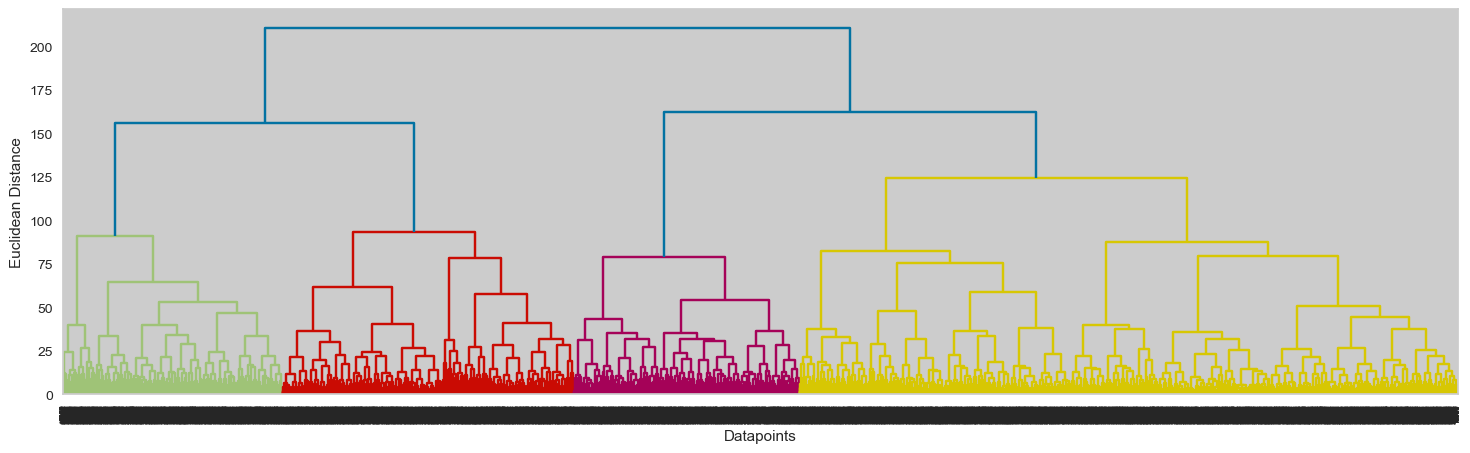

In [85]:
## Agglomerative clustering using original data :: sample dataset  of 20000 records
## to CLEARLY SHOW the DENDOGRAM and reduce computational time.

plt.figure(figsize=[18,5])
merg = linkage(pca_df, method='ward')
dendrogram(merg, leaf_rotation=90,)
plt.xlabel('Datapoints')
plt.ylabel('Euclidean Distance')
plt.show()

#### To represent in better manner

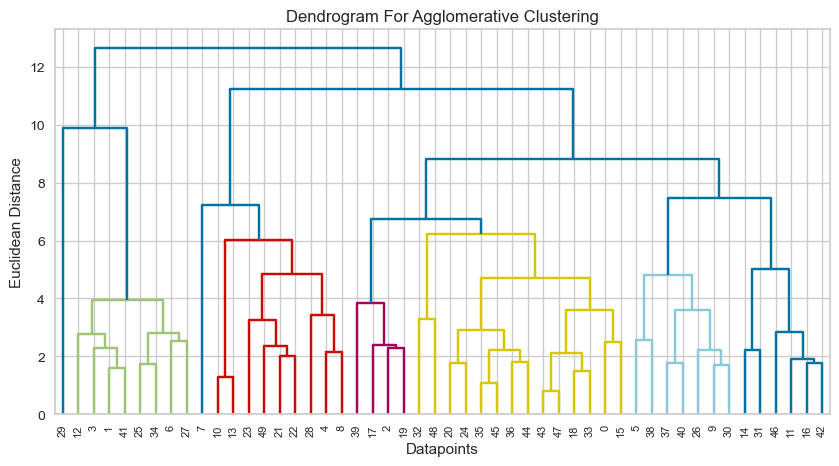

In [86]:
## Agglomerative clustering using original data :: sample dataset  of 20000 records
## to CLEARLY SHOW the DENDOGRAM and reduce computational time.

plt.figure(figsize=[10,5])
merg = linkage(pca_df[:50], method='ward')
dendrogram(merg, leaf_rotation=90, color_threshold=0.5*max(merg[:, 2]))
plt.title('Dendrogram For Agglomerative Clustering')
plt.xlabel('Datapoints')
plt.ylabel('Euclidean Distance')
plt.show()

- The dendrogram analysis suggests an optimal cluster count of four (k=4).

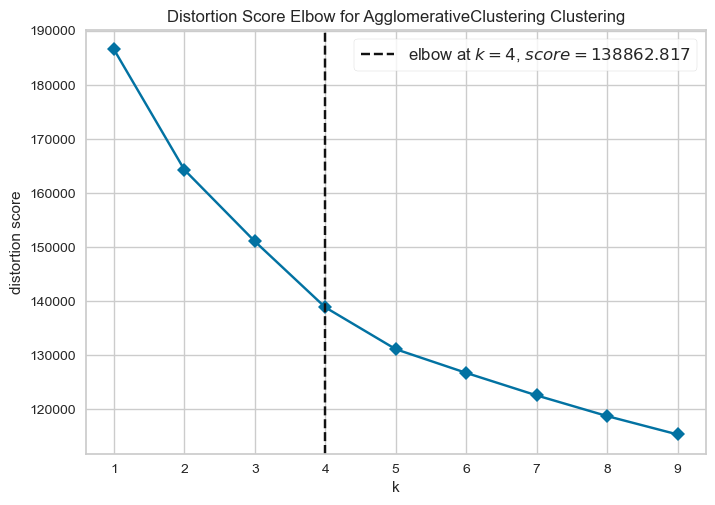

<Axes: title={'center': 'Distortion Score Elbow for AgglomerativeClustering Clustering'}, xlabel='k', ylabel='distortion score'>

In [87]:

model_2 = AgglomerativeClustering(linkage='ward')
visulizer = KElbowVisualizer(model_2,k=(1,10),timings=False)
visulizer.fit(pca_df)
visulizer.show()

In [88]:
## Building hierarchical clustering model using the optimal clusters as 4 for the sample dataset 

hie_cluster = AgglomerativeClustering(n_clusters=4, affinity='euclidean', linkage='ward')
hie_cluster_model = hie_cluster.fit(pca_df)

In [89]:
# Computing Silhoutte score from Agglomerative clustering

for i in range(2,15):
    hier = AgglomerativeClustering(n_clusters=i)
    hier = hier.fit(pca_df)
    labels = hier.fit_predict(pca_df)
    print('\033[1mSilhouette Score for Cluster :\033[0m',i,' is -', silhouette_score(pca_df,labels))

Silhouette Score for Cluster : 2  is - 0.1259161983834148
Silhouette Score for Cluster : 3  is - 0.11260511055321266
Silhouette Score for Cluster : 4  is - 0.12012955786824754
Silhouette Score for Cluster : 5  is - 0.08169931661841255
Silhouette Score for Cluster : 6  is - 0.06434097720796189
Silhouette Score for Cluster : 7  is - 0.07024367351907632
Silhouette Score for Cluster : 8  is - 0.05962534972416456
Silhouette Score for Cluster : 9  is - 0.061109058153547516
Silhouette Score for Cluster : 10  is - 0.042560807178217905
Silhouette Score for Cluster : 11  is - 0.04902831470678511
Silhouette Score for Cluster : 12  is - 0.052744478003545155
Silhouette Score for Cluster : 13  is - 0.05792819591067529
Silhouette Score for Cluster : 14  is - 0.06266114597990252


The Silhouette score and the Dendrogram are two different methods used to determine the optimal number of clusters, and they may not always tally. The Silhouette score is a measure of how similar an object is to its own cluster compared to other clusters. In this case, the **silhouette score is highest for k=2** (0.1259), suggesting that 2 clusters might be a good choice.

On the other hand, the dendrogram is a tree diagram used to illustrate the arrangement of the clusters produced by hierarchical clustering. The suggestion of **k=4 from the dendrogram** means that the data points are grouped in a way that might make sense for this dataset.

The difference between these two methods could be due to the different ways of evaluating what a good cluster. The silhouette score prioritizes having dense clusters that are well separated, while the dendrogram reflects the structure of the data that hierarchical clustering captures.

## Conclusion -

### 17. Perform cluster analysis by doing bivariate analysis between cluster labels and different features and write your conclusion on the results.

In [90]:
## Creating a dataframe of the labels 

labelled_df = pd.DataFrame(hie_cluster_model.labels_,columns=['Labels'])
labelled_df.head()

Labels
0       1
1       1
2       2
3       1
4       3

In [91]:
labelled_df.value_counts()

Labels
0         9426
1         4178
2         3238
3         3158
dtype: int64

In [92]:
labelled_df.shape

(20000, 1)

In [93]:
data.shape

(20000, 10)

In [94]:
## Joining the label dataframes with unscaled initial cleaned dataframe 
df_hier = data.join(labelled_df)
df_hier.head()

fit bust size  weight  rating rented for  body type category  height  \
0    fit       34c   140.0     8.0       work       pear    dress    67.0   
1    fit       36d   140.0    10.0      other  full bust    dress    64.0   
2    fit       32b   100.0    10.0      party     petite   sheath    62.0   
3    fit      36dd   163.0    10.0   everyday  full bust   jacket    66.0   
4  small       36b   135.0     8.0    wedding  hourglass    shift    68.0   

   size   age  Labels  
0     8  37.0       1  
1    20  37.0       1  
2     1  30.0       2  
3    20  47.0       1  
4    20  32.0       3

In [95]:
df_hier.shape

(20000, 11)

In [96]:
df_hier.isnull().sum().sum()

0

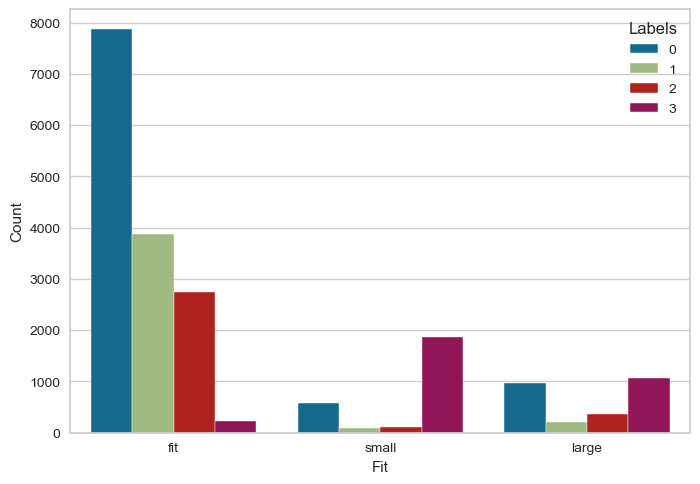

In [97]:
sns.countplot(x = 'fit', hue = 'Labels', data = df_hier)
plt.xlabel('Fit')
plt.ylabel('Count')
plt.show()

In [98]:
df_fit = pd.DataFrame(df_hier.groupby('fit')['Labels'].value_counts())
df_fit

Labels
fit   Labels        
fit   0         7868
      1         3879
      2         2748
      3          230
large 3         1062
      0          971
      2          372
      1          200
small 3         1866
      0          587
      2          118
      1           99

We can infer the following -

- In the ‘fit’ category, Label 0 has the highest count (7868), followed by Label 1 (3879), Label 2 (2748), and Label 3 (230). 
- In the ‘large’ category, Label 3 has the highest count (1062), followed by Label 0 (971), Label 2 (372), and Label 1 (200). 
- In the ‘small’ category, Label 3 has the highest count (1866), followed by Label 0 (587), Label 2 (118), and Label 1 (99). 

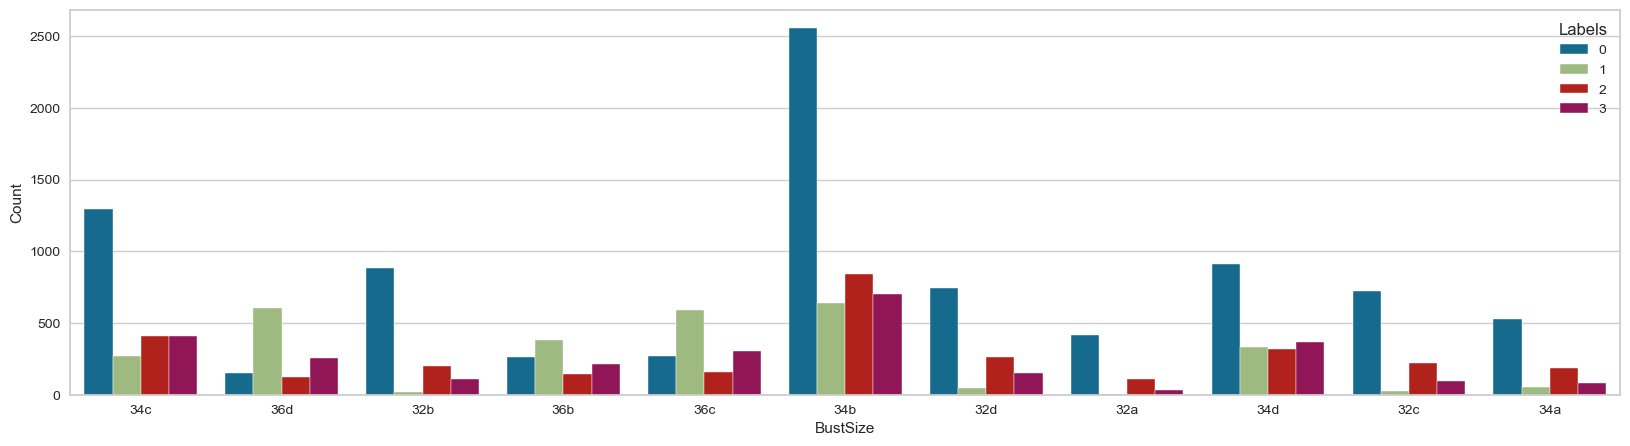

In [99]:
plt.figure(figsize=[20,5])

df_filtered_size = df_hier[df_hier['bust size'].map(df_hier['bust size'].value_counts()) > 500]

sns.countplot(x = 'bust size', hue = 'Labels', data = df_filtered_size)
plt.xlabel('BustSize')
plt.ylabel('Count')
plt.show()

In [100]:
df_bsize = pd.DataFrame(df_filtered_size.groupby('bust size')['Labels'].value_counts())
df_bsize

Labels
bust size Labels        
32a       0          416
          2          113
          3           36
          1            3
32b       0          882
          2          201
          3          109
          1           18
32c       0          720
          2          220
          3           94
          1           24
32d       0          747
          2          262
          3          150
          1           45
34a       0          528
          2          184
          3           82
          1           56
34b       0         2556
          2          841
          3          703
          1          637
34c       0         1297
          3          411
          2          406
          1          271
34d       0          912
          3          371
          1          333
          2          321
36b       1          379
          0          260
          3          211
          2          143
36c       1          588
          3          306
          0          267
          2          157
36d       1          605
          3          257
          0          154
          2          122

We are refining our dataset to concentrate on the values that appear most frequently, specifically those that occur over 500 times. Given the extensive nature of our dataset, this strategy allows us to focus on the most prevalent data. This approach helps us gain a quick understanding of the most common or frequently occuring values.

We can infer the following -

- The highest count is for ‘bust size’ 34b with Label 0 having the highest value.
- For ‘bust size’ 32a, the highest count is for Label 0 (416), followed by Label 2 (113), Label 3 (36), and Label 1 (3).
- For ‘bust size’ 32b, the highest count is for Label 0 (882), followed by Label 2 (201), Label 3 (109), and Label 1 (18).
- For ‘bust size’ 32c, the highest count is for Label 0 (720), followed by Label 2 (220), Label 3 (94), and Label 1 (24).
- For ‘bust size’ 32d, the highest count is for Label 0 (747), followed by Label 2 (262), Label 3 (150), and Label 1 (45).
- For ‘bust size’ 34a, the highest count is for Label 0 (528), followed by Label 2 (184), Label 3 (82), and Label 1 (56).
- For ‘bust size’ 34b, the highest count is for Label 0 (2556), followed by Label 2 (841), Label 3 (703), and Label 1 (637).
- For ‘bust size’ 34c, the highest count is for Label 0 (1297), followed by Label 3 (411), Label 2 (406), and Label 1 (271).
- For ‘bust size’ 34d, the highest count is for Label 0 (912), followed by Label 3 (371), Label 1 (333), and Label 2 (321).
- For ‘bust size’ 36b, the highest count is for Label 1 (379), followed by Label 0 (260), Label 3 (211), and Label 2 (143).
- For ‘bust size’ 36c, the highest count is for Label 1 (588), followed by Label 3 (306), Label 0 (267), and Label 2 (157).
- For ‘bust size’ 36d, the highest count is for Label 1 (605), followed by Label 3 (257), Label 0 (154), and Label 2 (122).

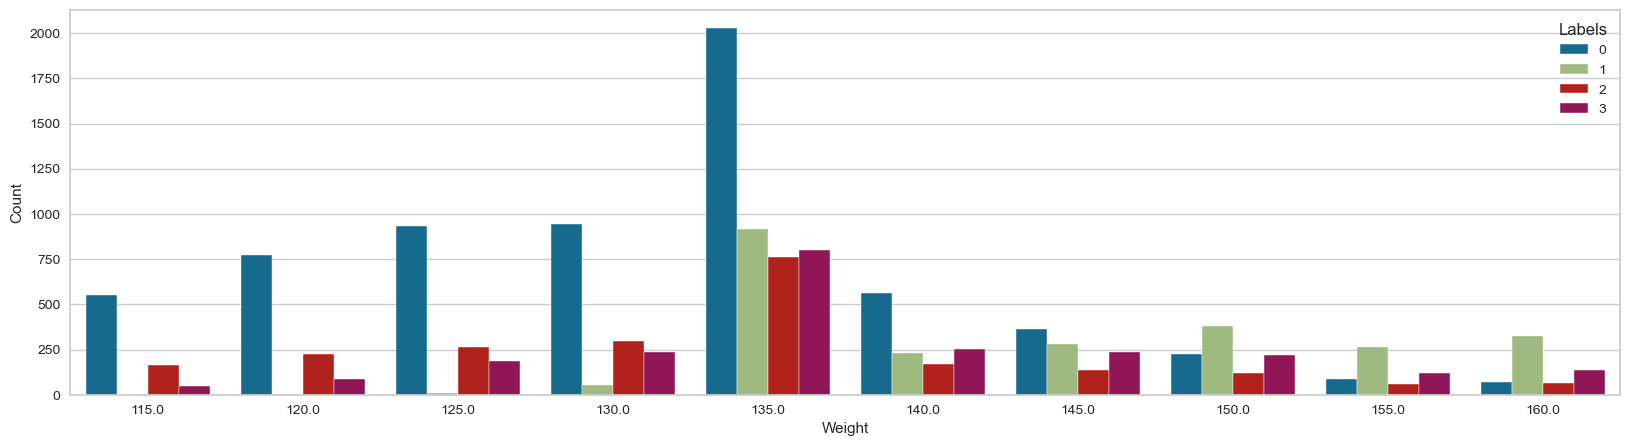

In [101]:
plt.figure(figsize=[20,5])

df_filtered_weight = df_hier[df_hier['weight'].map(df_hier['weight'].value_counts()) > 500]

sns.countplot(x = 'weight', hue = 'Labels', data = df_filtered_weight)
plt.xlabel('Weight')
plt.ylabel('Count')
plt.show()

In [102]:
df_weight = pd.DataFrame(df_filtered_weight.groupby('weight')['Labels'].value_counts())
df_weight

Labels
weight Labels        
115.0  0          551
       2          162
       3           49
120.0  0          775
       2          227
       3           88
       1            3
125.0  0          931
       2          264
       3          188
       1           12
130.0  0          945
       2          298
       3          235
       1           55
135.0  0         2028
       1          915
       3          798
       2          762
140.0  0          562
       3          253
       1          230
       2          168
145.0  0          362
       1          279
       3          238
       2          139
150.0  1          379
       0          224
       3          218
       2          118
155.0  1          265
       3          118
       0           85
       2           57
160.0  1          323
       3          138
       0           72
       2           66

We are refining our dataset to concentrate on the values that appear most frequently, specifically those that occur over 500 times. Given the extensive nature of our dataset, this strategy allows us to focus on the most prevalent data. This approach helps us gain a quick understanding of the most common or frequently occuring values.

We can infer the following -

- The majority of the weight is for 135lbs. 
- For ‘weight’ 115.0, the highest count is for Label 0 (551), followed by Label 2 (162), and Label 3 (49).
- For ‘weight’ 120.0, the highest count is for Label 0 (775), followed by Label 2 (227), Label 3 (88), and Label 1 (3).
- For ‘weight’ 125.0, the highest count is for Label 0 (931), followed by Label 2 (264), Label 3 (188), and Label 1 (12).
- For ‘weight’ 130.0, the highest count is for Label 0 (945), followed by Label 2 (298), Label 3 (235), and Label 1 (55).
- For ‘weight’ 135.0, the highest count is for Label 0 (2028), followed by Label 1 (915), Label 3 (798), and Label 2 (762).
- For ‘weight’ 140.0, the highest count is for Label 0 (562), followed by Label 3 (253), Label 1 (230), and Label 2 (168).
- For ‘weight’ 145.0, the highest count is for Label 0 (362), followed by Label 1 (279), Label 3 (238), and Label 2 (139).
- For ‘weight’ 150.0, the highest count is for Label 1 (379), followed by Label 0 (224), Label 3 (218), and Label 2(118).
- For ‘weight’ 155.0, the highest count is for Label 1 (265), followed by Label 3 (118), Label 0 (85), and Label 2(57).
- For ‘weight’ 160.0, the highest count is for Label 1(323), followed by Label 3(138), Label 0(72) and Label 2 (66).

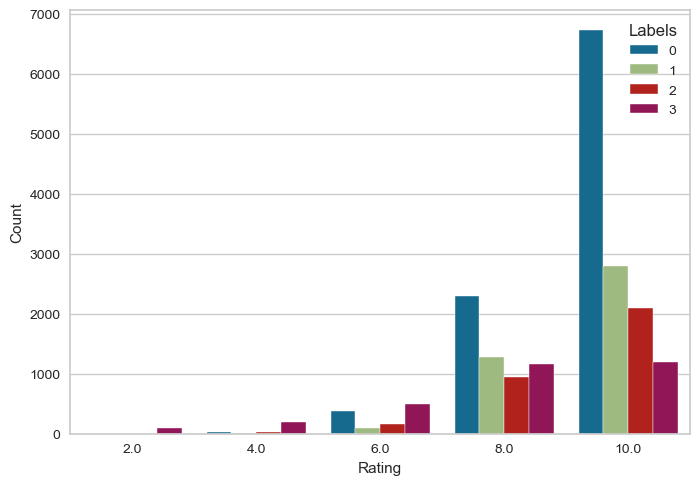

In [103]:
sns.countplot(x = 'rating', hue = 'Labels', data = df_hier)
plt.xlabel('Rating')
plt.ylabel('Count')
plt.show()

In [104]:
df_rating = pd.DataFrame(df_hier.groupby('rating')['Labels'].value_counts())
df_rating

Labels
rating Labels        
2.0    3          102
       1            2
4.0    3          203
       0           32
       2           21
       1           10
6.0    3          497
       0          374
       2          169
       1           92
8.0    0         2298
       1         1281
       3         1154
       2          949
10.0   0         6722
       1         2793
       2         2099
       3         1202

We can infer the following -

- The majority of the ratings fall between 8.0 and 10.0. 
- The highest count is for the rating of 10.0 with Label 0 having the highest value.
- For ‘rating’ 2.0, the highest count is for Label 3 (102), followed by Label 1 (2).
- For ‘rating’ 4.0, the highest count is for Label 3 (203), followed by Label 0 (32), Label 2 (21), and Label 1 (10).
- For ‘rating’ 6.0, the highest count is for Label 3 (497), followed by Label 0 (374), Label 2 (169), and Label 1 (92).
- For ‘rating’ 8.0, the highest count is for Label 0 (2298), followed by Label 1 (1281), Label 3 (1154), and Label 2 (949).
- For ‘rating’ 10.0, the highest count is for Label 0 (6722), followed by Label 1 (2793), Label 2 (2099), and Label 3 (1202).

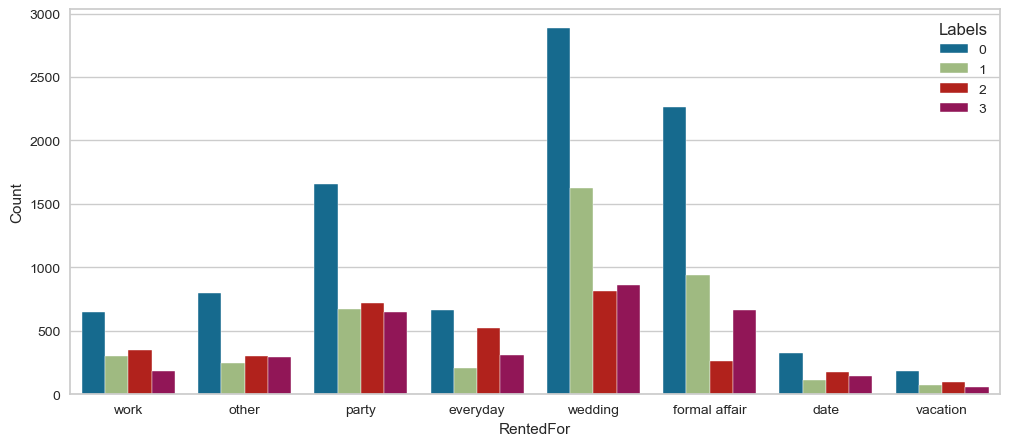

In [105]:
plt.figure(figsize=[12,5])

sns.countplot(x = 'rented for', hue = 'Labels', data = df_hier)
plt.xlabel('RentedFor')
plt.ylabel('Count')
plt.show()

In [106]:
df_rented = pd.DataFrame(df_hier.groupby('rented for')['Labels'].value_counts())
df_rented

Labels
rented for    Labels        
date          0          325
              2          177
              3          146
              1          113
everyday      0          665
              2          519
              3          312
              1          209
formal affair 0         2265
              1          937
              3          662
              2          262
other         0          796
              2          299
              3          294
              1          246
party         0         1660
              2          721
              1          675
              3          649
vacation      0          181
              2           97
              1           72
              3           55
wedding       0         2889
              1         1628
              3          858
              2          812
work          0          645
              2          351
              1          298
              3          182

We can infer the following -

- The majority of the 'Rented For' falls under the category of 'Wedding'.
- The highest count is for Wedding with Label 0 having the highest value.
- For ‘rented for’ date, the highest count is for Label 0 (325), followed by Label 2 (177), Label 3 (146), and Label 1 (113).
- For ‘rented for’ everyday, the highest count is for Label 0 (665), followed by Label 2 (519), Label 3 (312), and Label 1 (209).
- For ‘rented for’ formal affair, the highest count is for Label 0 (2265), followed by Label 1 (937), Label 3 (662), and Label 2 (262).
- For ‘rented for’ other, the highest count is for Label 0 (796), followed by Label 2 (299), Label 3 (294), and Label 1 (246).
- For ‘rented for’ party, the highest count is for Label 0 (1660), followed by Label 2 (721), Label 1 (675), and Label 3 (649).
- For ‘rented for’ vacation, the highest count is for Label 0 (181), followed by Label 2 (97), Label 1 (72), and Label 3(55).
- For ‘rented for’ wedding, the highest count is for Label 0 (2889), followed by Label 1(1628), Label 3(858) and Label 2 (812).
- For ‘rented for’ work, the highest count is for Label 0(645), followed by Label 2 (351), Label 1 (298) and Label 3 (182).

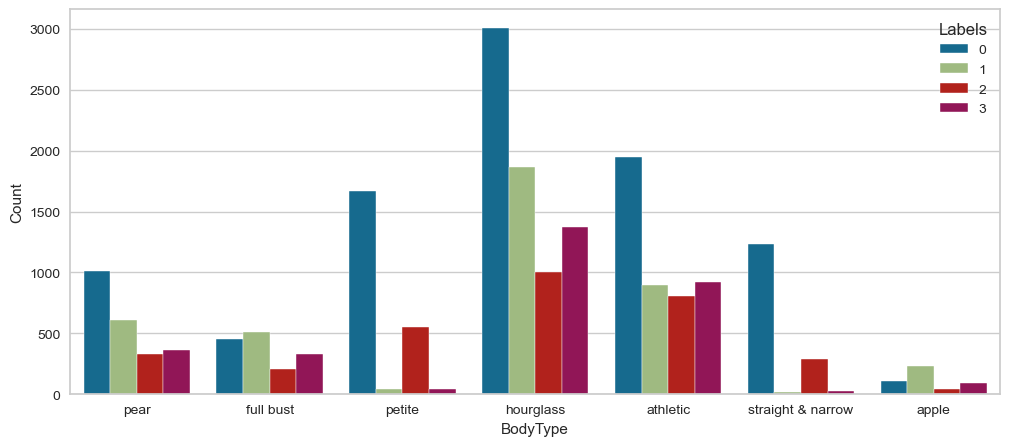

In [107]:
plt.figure(figsize=[12,5])

sns.countplot(x = 'body type', hue = 'Labels', data = df_hier)
plt.xlabel('BodyType')
plt.ylabel('Count')
plt.show()

In [108]:
df_bodytype = pd.DataFrame(df_hier.groupby('body type')['Labels'].value_counts())
df_bodytype

Labels
body type         Labels        
apple             1          233
                  0          107
                  3           94
                  2           46
athletic          0         1945
                  3          923
                  1          895
                  2          810
full bust         1          513
                  0          450
                  3          329
                  2          206
hourglass         0         3009
                  1         1865
                  3         1376
                  2         1007
pear              0         1009
                  1          612
                  3          366
                  2          328
petite            0         1671
                  2          549
                  3           46
                  1           43
straight & narrow 0         1235
                  2          292
                  3           24
                  1           17

We can infer the following -

- The majority of the 'Body Type' falls under the category of 'Hourglass' with Label 0 having the highest value.
- For ‘body type’ apple, the highest count is for Label 1 (233), followed by Label 0 (107), Label 3 (94), and Label 2 (46).
- For ‘body type’ athletic, the highest count is for Label 0 (1945), followed by Label 3 (923), Label 1 (895), and Label 2 (810).
- For ‘body type’ full bust, the highest count is for Label 1 (513), followed by Label 0 (450), Label 3 (329), and Label 2 (206).
- For ‘body type’ hourglass, the highest count is for Label 0 (3009), followed by Label 1 (1865), Label 3 (1376), and Label 2 (1007).
- For ‘body type’ pear, the highest count is for Label 0 (1009), followed by Label 1 (612), Label 3 (366), and Label 2(328).
- For ‘body type’ petite, the highest count is for Label 0 (1671), followed by Label 2 (549), Label 3 (46) and Label 1 (43).
- For ‘body type’ straight & narrow, the highest count is for Label 0 (1235), followed by Label 2 (292), Label 3 (24) and Label 1 (17).

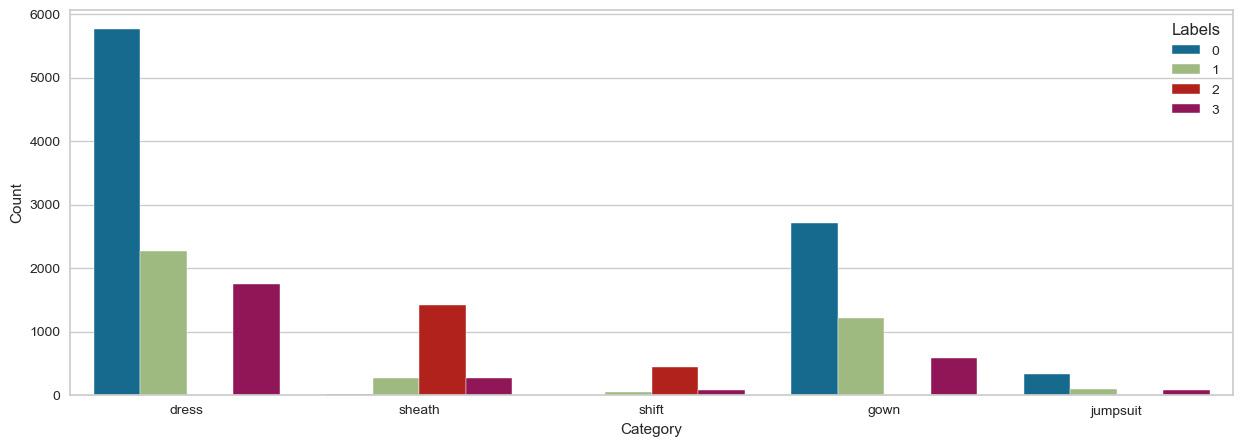

In [109]:
plt.figure(figsize=[15,5])

df_filtered_category = df_hier[df_hier['category'].map(df_hier['category'].value_counts()) > 500]

sns.countplot(x = 'category', hue = 'Labels', data = df_filtered_category)
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()


In [110]:
df_category = pd.DataFrame(df_filtered_category.groupby('category')['Labels'].value_counts())
df_category

Labels
category Labels        
dress    0         5775
         1         2269
         3         1754
gown     0         2707
         1         1220
         3          591
jumpsuit 0          343
         1          102
         3           89
         2           10
sheath   2         1430
         3          266
         1          265
         0           20
shift    2          440
         3           89
         1           50
         0           10

We are refining our dataset to concentrate on the values that appear most frequently, specifically those that occur over 500 times. Given the extensive nature of our dataset, this strategy allows us to focus on the most prevalent data. This approach helps us gain a quick understanding of the most common or frequently occuring values.

We can infer the following -

- The majority of the 'Category' falls under 'Dress'. 
- The highest count is for Category - Dress with Label 0 having the highest value.
- For ‘category’ dress, the highest count is for Label 0 (5775), followed by Label 1 (2269), and Label 3 (1754).
- For ‘category’ gown, the highest count is for Label 0 (2707), followed by Label 1 (1220), and Label 3 (591).
- For ‘category’ jumpsuit, the highest count is for Label 0 (343), followed by Label 1 (102), Label 3 (89), and Label 2 (10).
- For ‘category’ sheath, the highest count is for Label 2 (1430), followed by Label 3 (266), Label 1 (265), and Label 0 (20).
- For ‘category’ shift, the highest count is for Label 2 (440), followed by Label 3 (89), Label 1 (50), and Label 0(10).

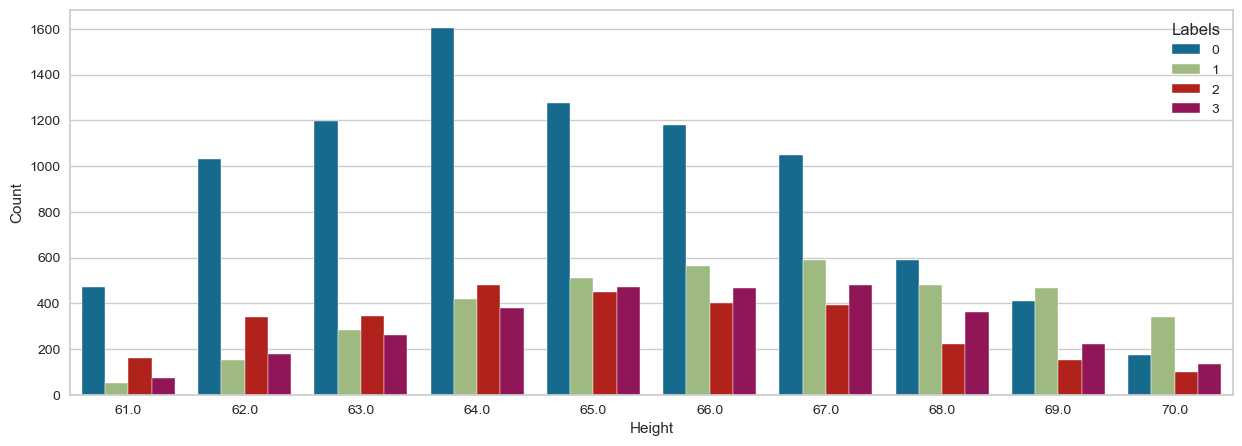

In [111]:
plt.figure(figsize=[15,5])

df_filtered_height = df_hier[df_hier['height'].map(df_hier['height'].value_counts()) > 500]

sns.countplot(x = 'height', hue = 'Labels', data = df_filtered_height)
plt.xlabel('Height')
plt.ylabel('Count')
plt.show()


In [112]:
df_height = pd.DataFrame(df_filtered_height.groupby('height')['Labels'].value_counts())
df_height

Labels
height Labels        
61.0   0          471
       2          160
       3           71
       1           52
62.0   0         1031
       2          338
       3          180
       1          153
63.0   0         1197
       2          343
       1          285
       3          261
64.0   0         1604
       2          479
       1          417
       3          381
65.0   0         1274
       1          511
       3          472
       2          450
66.0   0         1181
       1          564
       3          469
       2          400
67.0   0         1048
       1          588
       3          478
       2          393
68.0   0          591
       1          479
       3          360
       2          221
69.0   1          466
       0          410
       3          223
       2          154
70.0   1          342
       0          174
       3          134
       2          101

We are refining our dataset to concentrate on the values that appear most frequently, specifically those that occur over 500 times. Given the extensive nature of our dataset, this strategy allows us to focus on the most prevalent data. This approach helps us gain a quick understanding of the most common or frequently occuring values.

We can infer the following -

- The majority of the 'Height' falls in between 61 - 72 Inches.
- The highest count is for Height is 64 Inches with Label 0 having the highest value.
- For ‘height’ 61.0, the highest count is for Label 0 (471), followed by Label 2 (160), Label 3 (71), and Label 1 (52).
- For ‘height’ 62.0, the highest count is for Label 0 (1031), followed by Label 2 (338), Label 3 (180), and Label 1 (153).
- For ‘height’ 63.0, the highest count is for Label 0 (1197), followed by Label 2 (343), Label 1 (285), and Label 3 (261).
- For ‘height’ 64.0, the highest count is for Label 0 (1604), followed by Label 2 (479), Label 1 (417), and Label 3 (381).
- For ‘height’ 65.0, the highest count is for Label 0 (1274), followed by Label 1 (511), Label 3 (472), and Label 2(450).
- For ‘height’ 66.0, the highest count is for Label 0(1181), followed by Label 1(564), Label 3 (469) and Label 2 (400).
- For ‘height’ 67.0, the highest count is for Label 0(1048), followed by Label 1(588), Label 3 (478) and Label 2 (393).
- For ‘height’ 68.0, the highest count is for Label 0(591), followed by Label 1(479), Label 3 (360) and Label 2 (221).
- For ‘height’ 69.0, the highest count is for Label 1(466), followed by Label 0 (410), Label 3 (223) and Label 2 (154).
- For ‘height’ 70.0, the highest count is for Label 1(342), followed by Label 0 (174), Label 3 (134) and Label 2 (101).

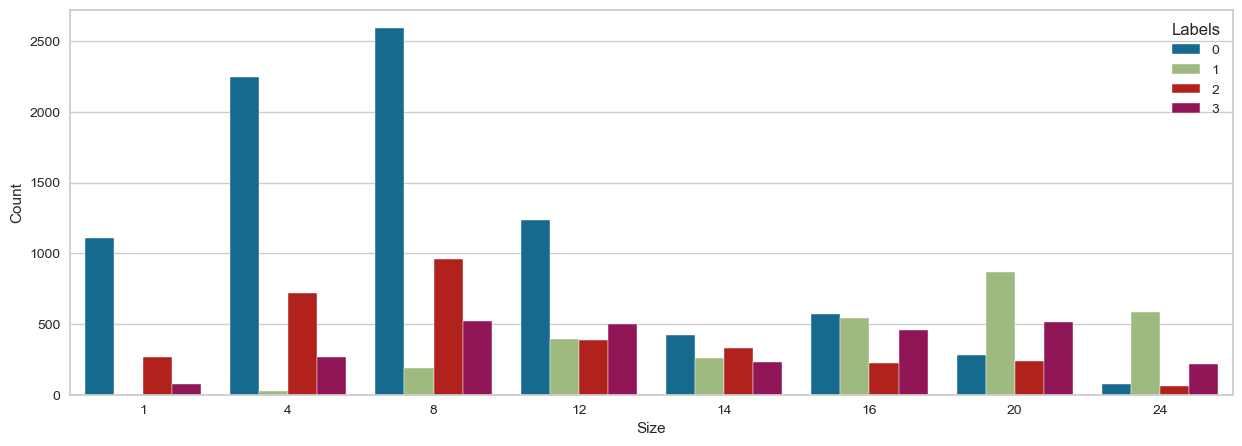

In [113]:
plt.figure(figsize=[15,5])

df_filtered_size = df_hier[df_hier['size'].map(df_hier['size'].value_counts()) > 500]

sns.countplot(x = 'size', hue = 'Labels', data = df_filtered_size)
plt.xlabel('Size')
plt.ylabel('Count')
plt.show()


In [114]:
df_size = pd.DataFrame(df_filtered_size.groupby('size')['Labels'].value_counts())
df_size

Labels
size Labels        
1    0         1108
     2          265
     3           79
     1            5
4    0         2246
     2          721
     3          269
     1           27
8    0         2592
     2          959
     3          523
     1          189
12   0         1233
     3          497
     1          392
     2          388
14   0          425
     2          333
     1          257
     3          228
16   0          572
     1          543
     3          457
     2          224
20   1          866
     3          511
     0          281
     2          235
24   1          586
     3          215
     0           79
     2           62

We are refining our dataset to concentrate on the values that appear most frequently, specifically those that occur over 500 times. Given the extensive nature of our dataset, this strategy allows us to focus on the most prevalent data. This approach helps us gain a quick understanding of the most common or frequently occuring values.

We can infer the following -

- The most rented Size is 8 with Label 0 having the highest value.
- For ‘size’ 1, the highest count is for Label 0 (1108), followed by Label 2 (265), Label 3 (79), and Label 1 (5).
- For ‘size’ 4, the highest count is for Label 0 (2246), followed by Label 2 (721), Label 3 (269), and Label 1 (27).
- For ‘size’ 8, the highest count is for Label 0 (2592), followed by Label 2 (959), Label 3 (523), and Label 1 (189).
- For ‘size’ 12, the highest count is for Label 0 (1233), followed by Label 3 (497), Label 1 (392), and Label 2 (388).
- For ‘size’ 14, the highest count is for Label 0 (425), followed by Label 2 (333), Label 1 (257), and Label 3(228).
- For ‘size’ 16, the highest count is for Label 0 (572), followed by Label 1 (543), Label 3 (457) and Label 2 (224).
- For ‘size’ 20, the highest count is for Label 1 (866), followed by Label 3 (511), Label 0 (281) and Label 2 (235).
- For ‘size’ 24, the highest count is for Label 1 (586), followed by Label 3 (215), Label 0 (79) and Label 2 (62).

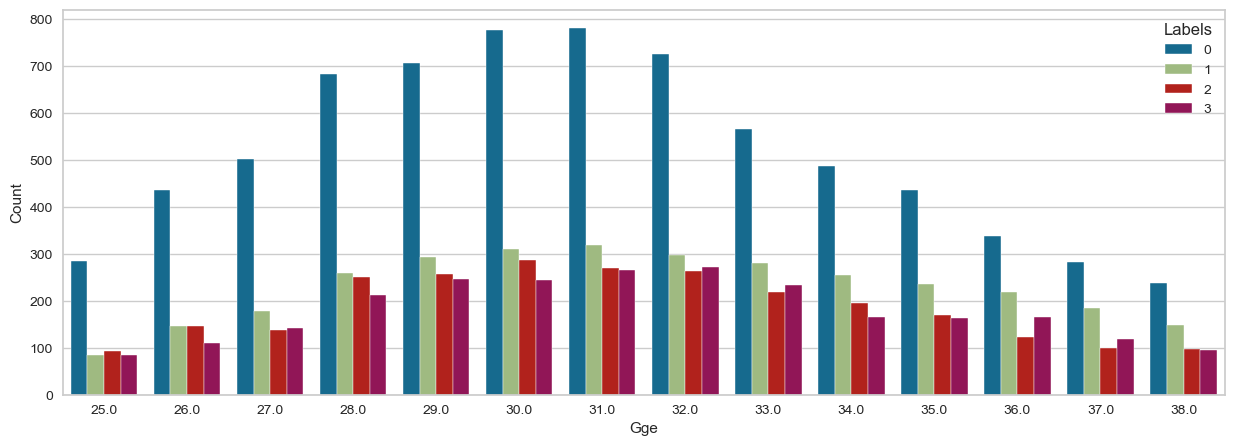

In [115]:
plt.figure(figsize=[15,5])

df_filtered_age = df_hier[df_hier['age'].map(df_hier['age'].value_counts()) > 500]

sns.countplot(x = 'age', hue = 'Labels', data = df_filtered_age)
plt.xlabel('Gge')
plt.ylabel('Count')
plt.show()


In [116]:
df_age = pd.DataFrame(df_filtered_age.groupby('age')['Labels'].value_counts())
df_age

Labels
age  Labels        
25.0 0          285
     2           94
     3           85
     1           84
26.0 0          437
     1          147
     2          147
     3          111
27.0 0          502
     1          179
     3          143
     2          137
28.0 0          684
     1          260
     2          250
     3          212
29.0 0          707
     1          294
     2          258
     3          247
30.0 0          776
     1          310
     2          288
     3          245
31.0 0          781
     1          319
     2          269
     3          266
32.0 0          726
     1          298
     3          272
     2          263
33.0 0          566
     1          281
     3          234
     2          219
34.0 0          487
     1          255
     2          196
     3          166
35.0 0          435
     1          236
     2          170
     3          163
36.0 0          339
     1          218
     3          166
     2          124
37.0 0          282
     1          185
     3          119
     2          100
38.0 0          238
     1          148
     2           98
     3           96

We are refining our dataset to concentrate on the values that appear most frequently, specifically those that occur over 500 times. Given the extensive nature of our dataset, this strategy allows us to focus on the most prevalent data. This approach helps us gain a quick understanding of the most common or frequently occuring values.

We can infer the following -

- The most frequent Age is between 25 and 38 with Label 0 having the highest overall value.
- The overall value of Label 0 is followed by Label 1.
- For ‘age’ 25.0, the highest count is for Label 0 (285), followed by Label 2 (94), Label 3 (85), and Label 1 (84).
- For ‘age’ 26.0, the highest count is for Label 0 (437), followed by Label 1 (147), Label 2 (147), and Label 3 (111).
- For ‘age’ 27.0, the highest count is for Label 0 (502), followed by Label 1 (179), Label 3 (143), and Label 2 (137).
- For ‘age’ 28.0, the highest count is for Label 0 (684), followed by Label 1 (260), Label 2 (250), and Label 3 (212).
- For ‘age’ 29.0, the highest count is for Label 0 (707), followed by Label 1 (294), Label 2 (258), and Label 3(247).
- For ‘age’ 30.0, the highest count is for Label 0 (776), followed by Label 1 (310), Label 2 (288) and Label 3 (245).
- For ‘age’ 31.0, the highest count is for Label 0 (781), followed by Label 1 (319), Label 2 (269) and Label 3 (266).
- For ‘age’ 32.0, the highest count is for Label 0 (726), followed by Label 1 (298), Label 3 (272) and Label 2 (263).
- For ‘age’ 33.0, the highest count is for Label 0 (566), followed by Label 1 (281), Label 3 (234) and Label 2 (219).
- For ‘age’ 34.0, the highest count is for Label 0 (487), followed by Label 1 (255), Label 2 (196) and Label 3 (166).
- For ‘age’ 35.0, the highest count is for Label 0 (435), followed by Label 1 (236), Label 2 (170) and Label 3 (163).
- For ‘age’ 36.0, the highest count is for Label 0 (339), followed by Label 1 (218), Label 3 (166) and Label 2 (124).
- For ‘age’ 37.0, the highest count is for Label 0 (282), followed by Label 1 (185), Label 3 (119) and Label 2 (100).
- For ‘age’ 38.0, the highest count is for Label 0 (238), followed by Label 1 (148), Label 2 (98) and Label 3 (96).

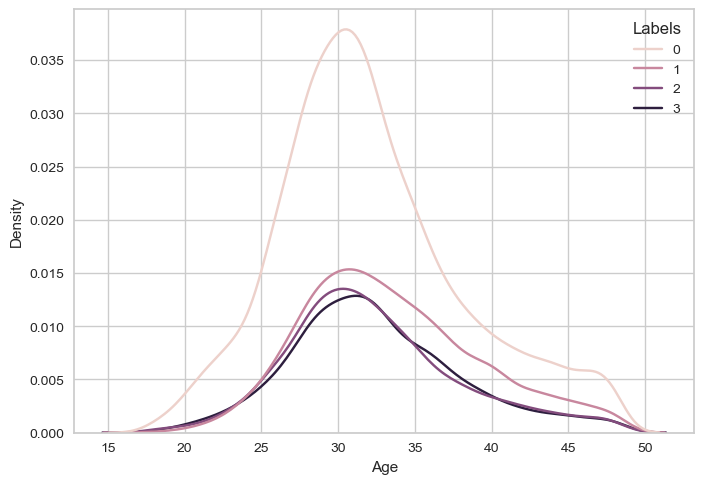

In [117]:
## Lets check the age distribution of the different clusters.
sns.kdeplot(x=df_hier['age'],hue='Labels',data=df_hier)
plt.xlabel('Age')
plt.ylabel('Density')
plt.show()

 - The distribution of the age for different clusters is almost same, but there are more number of observations assigned to the cluster 0.
 - Here, implemented PCA on the 'renttherunway' dataset and selected 8 PCA compoments, which gave us the 90-95% of the variance in the data.
 - Time of computation is more than 20 minutes, should be taken into consideration for getting the final result.


- Used the PCA dimensions to cluster the data and segment the similar data in to clusters using KMeans clustering.
- Used Kmeans clustering algorithm to cluster the data, First we chose the optimal K value with the help of elbow plot used obtained K value from elbow plot to build a kmeans clustering model.
- Computed the silhoutte score for the different K values and evaluated the goodness of the clustering technique used.
- Took the sample of the data and did agglomerative clustering using the original data and plotted dendrogram and analyzed the optimal number of classes and built a agglomerative clustering model using the obtained K value and evaluated the model using silhoutte score.
- In this dataset, we had less number of features, further we can ask the company to collect the demographic information such as income and education. Geographic info such as where the customer is located rural or urban, city etc. Behavioral info such as browsing, spent amount by category, sentiment towards specific products and price points, and lastly the survey on lifestyle info such as hobbies, fashion etc.
- By collecting more features, the customer segmentation/clustering of similar customers into groups will be more effective and we can infer more out of the clusters formed and will able to give suggestions to the company based on the analysis that will help the business to target the right customers and stand in the market for longer and make high revenue. 